In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt

from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8')

import gc

import logging
import warnings

warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA) Report

This report summarizes the key findings from the exploratory data analysis performed on the sales dataset.

### 1. Sales Distribution

-   **Zero Sales Percentage**: Approximately **68.00%** of days recorded zero sales, indicating a sparse sales pattern for many items.
-   **Non-Zero Daily Sales Distribution**: A histogram of non-zero daily sales shows a distribution heavily skewed towards lower sales values, with fewer instances of very high sales. This suggests that while most active sales days have modest figures, there are occasional spikes.

### 2. Feature Correlation

-   A correlation matrix was generated for 'sales', 'sell_price', 'snap_CA', 'snap_TX', and 'snap_WI'.
-   **Sales vs. Sell Price**: The scatter plot revealed no clear linear relationship or strong correlation between `sell_price` and `sales`. This suggests that price alone might not be the primary driver of sales, or the relationship is more complex.

### 3. Sales by Store and State

-   **Total Sales by Store**: The bar plot showed significant variation in total sales across different stores. Some stores consistently achieve higher total sales than others.
-   **Distribution of Daily Sales by Store**: Box plots of daily sales by store indicated varying distributions and median sales figures. While some stores have a higher median daily sales, all stores exhibit a considerable range in their daily sales, with outliers representing days of exceptionally high sales.
-   **Daily Sales Trends by State**: A line plot comparing daily sales trends across 'CA', 'TX', and 'WI' showed that sales volumes and patterns differ by state, with California generally having higher total daily sales. All states exhibit similar seasonal or weekly patterns in their sales fluctuations.

### 4. Temporal Sales Trends

-   **Average Daily Sales by Day of Week**: Sales tend to be higher on **weekends (Saturday and Sunday)** compared to weekdays, with a notable dip mid-week.
-   **Average Daily Sales by Month**: The average sales fluctuate throughout the year, with potential peaks and troughs corresponding to different months.
-   **Total Sales by Month (State-wise)**: Each state (CA, TX, WI) showed unique monthly sales patterns, although there were some common trends like increased sales during certain periods of the year. Texas sales were lower than California and Wisconsin. Wisconsin was slightly higher than Texas.
-   **Total Sales by Year**: The line plot indicated an increasing trend in total sales over the years, suggesting overall business growth.
-   **Monthly Sales Trend Over Time**: A detailed line plot of monthly sales showed cyclical patterns within each year, superimposed on an overall upward trend. This highlights both seasonality and long-term growth.

### 5. Event Impact on Sales

-   **Average Sales by Event Type (event_type_1)**: Events categorized as 'Cultural', 'National', and 'Religious' appear to have an impact on average sales, with specific event types correlating with higher sales volumes.
-   **Average Sales During Events Name (event_name_1)**: Specific event names also show varying impacts on total sales, indicating that certain promotions or holidays significantly boost sales.
-   **Most Sold Event Weekdays**: Sales on event days tend to be highest on **weekends (Saturday and Sunday)**, similar to general sales patterns, but events on these days likely amplify the existing trend.

### 6. Seasonal Sales

-   **Total Sales by Season**: Sales are generally higher in **Spring** and **Summer**, followed by Fall and Winter. This suggests a strong seasonal component to consumer purchasing behavior.

### Summary

The EDA revealed several important patterns:

-   A high proportion of zero sales, indicating the need for careful handling of data sparsity.
-   No direct linear relationship between `sell_price` and `sales`.
-   Significant variations in sales across different stores and states.
-   Strong temporal patterns, with higher sales on weekends, certain months, and during specific seasons.
-   A positive impact of events on sales, particularly when they coincide with weekends.
-   An overall upward trend in sales over the years, accompanied by clear monthly and seasonal cycles.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Fall_2025/CPSC_5305_Intro_to_DS/data/"

In [4]:
def reduce_mem_usage(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype

        #  Skip Datetime Columns
        if pd.api.types.is_datetime64_any_dtype(col_type):
            continue

        # Only process numeric columns for min/max
        if col_type != object and not isinstance(col_type, pd.CategoricalDtype):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                # This is where the error occurred previously for datetime types
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        # Handle categorical columns without min/max
        elif isinstance(col_type, pd.CategoricalDtype):
            df[col] = df[col].cat.as_unordered()  # Ensure no ordering assumption
        else:
            df[col] = df[col].astype('category')  # Convert objects to category
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print(f'Memory usage decreased from {start_mem:.2f} Mb to {end_mem:.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
    return df

In [5]:
print("Loading and reducing memory usage for data files...")
df = pd.read_parquet(f'{DATA_PATH}final_m5_processed.parquet')
df = reduce_mem_usage(df)
print("\nInitial data loading complete.")

Loading and reducing memory usage for data files...
Memory usage decreased from 2484.67 Mb to 2146.11 Mb (13.6% reduction)

Initial data loading complete.


In [6]:
gc.collect()

71

In [37]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,wm_yr_wk,sell_price,...,wday,month,year,snap_CA,snap_TX,snap_WI,event_name_1,event_type_1,event_name_2,event_type_2
0,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,11101,2.0,...,1,1,2011,0,0,0,No event,No event,No event,No event
1,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_2,0,11101,2.0,...,2,1,2011,0,0,0,No event,No event,No event,No event
2,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_3,0,11101,2.0,...,3,1,2011,0,0,0,No event,No event,No event,No event
3,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_4,1,11101,2.0,...,4,2,2011,1,1,0,No event,No event,No event,No event
4,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_5,4,11101,2.0,...,5,2,2011,1,0,1,No event,No event,No event,No event


## EDA

Percentage of days with zero sales: 68.00%


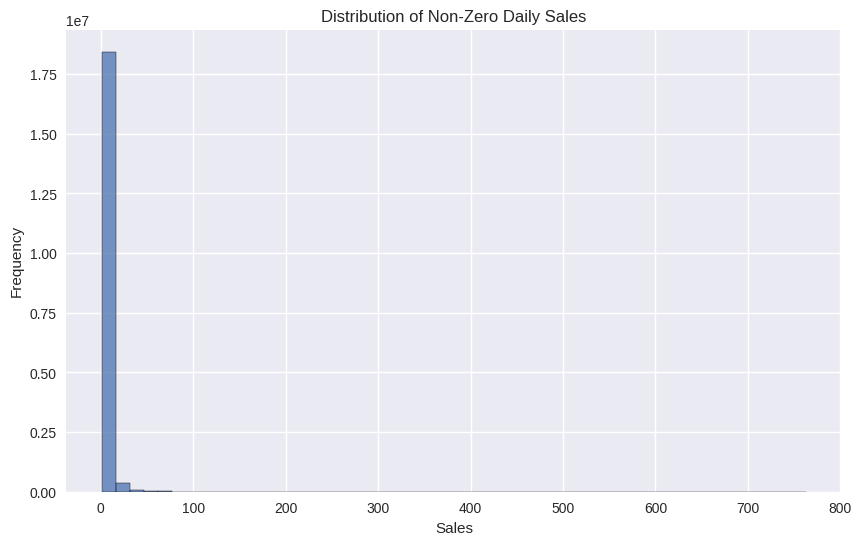

In [8]:
# zero-sales percentage
zero_sales_pct = (df['sales'] == 0).mean() * 100
print(f'Percentage of days with zero sales: {zero_sales_pct:.2f}%')

# histogram of sales (excluding zeros for better visibility of non-zero sales)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['sales'] > 0]['sales'], bins=50)
plt.title('Distribution of Non-Zero Daily Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

del zero_sales_pct

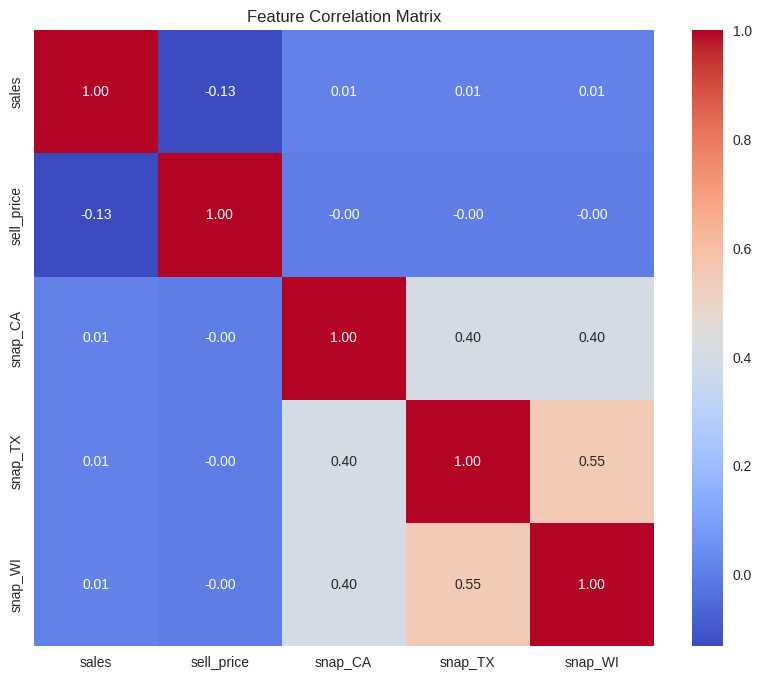

In [9]:
# relevant columns for correlation
corr_cols = ['sales', 'sell_price', 'snap_CA', 'snap_TX', 'snap_WI']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

del corr_cols, corr_matrix

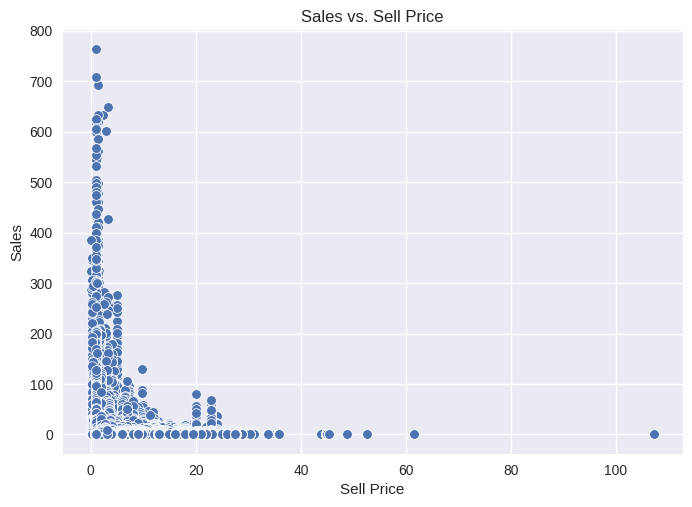

In [10]:
sns.scatterplot(data=df, x='sell_price', y='sales')
plt.title('Sales vs. Sell Price')
plt.xlabel('Sell Price')
plt.ylabel('Sales')

plt.show()

In [11]:
gc.collect()

6243

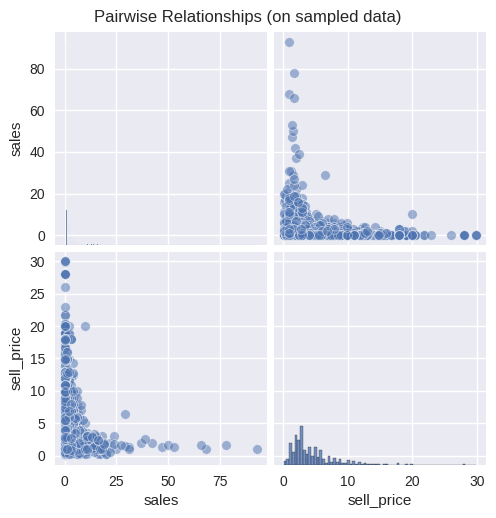

In [12]:
# take a sample
df_sample = df.sample(n=5000, random_state=42)

# pairwise relationships
sns.pairplot(df_sample[['sales', 'sell_price']],
             plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships (on sampled data)', y=1.02)
plt.show()

del df_sample

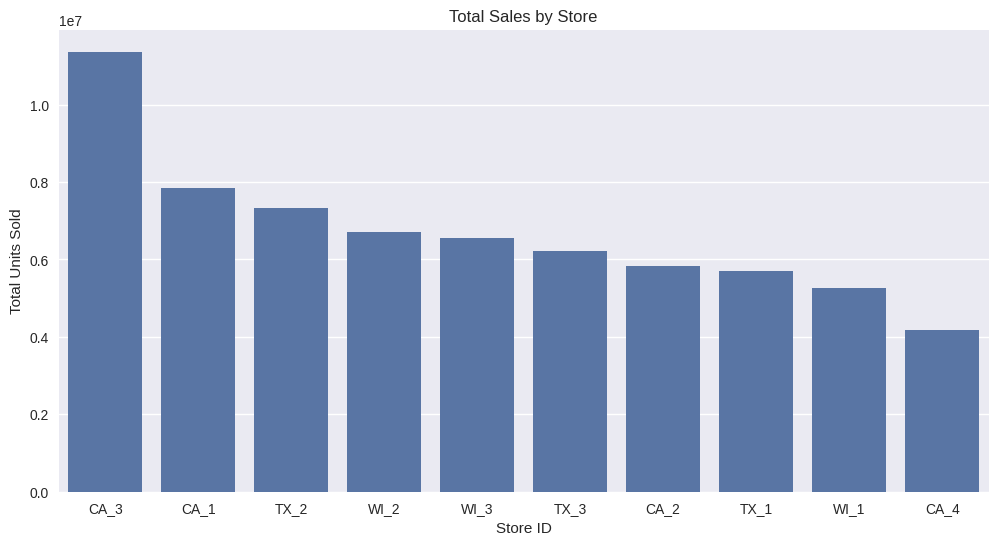

In [13]:
# aggregate sales by store
store_sales = df.groupby('store_id')['sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='store_id', y='sales', data=store_sales, order=store_sales.sort_values('sales', ascending=False)['store_id'])
plt.title('Total Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Units Sold')
plt.show()

del store_sales

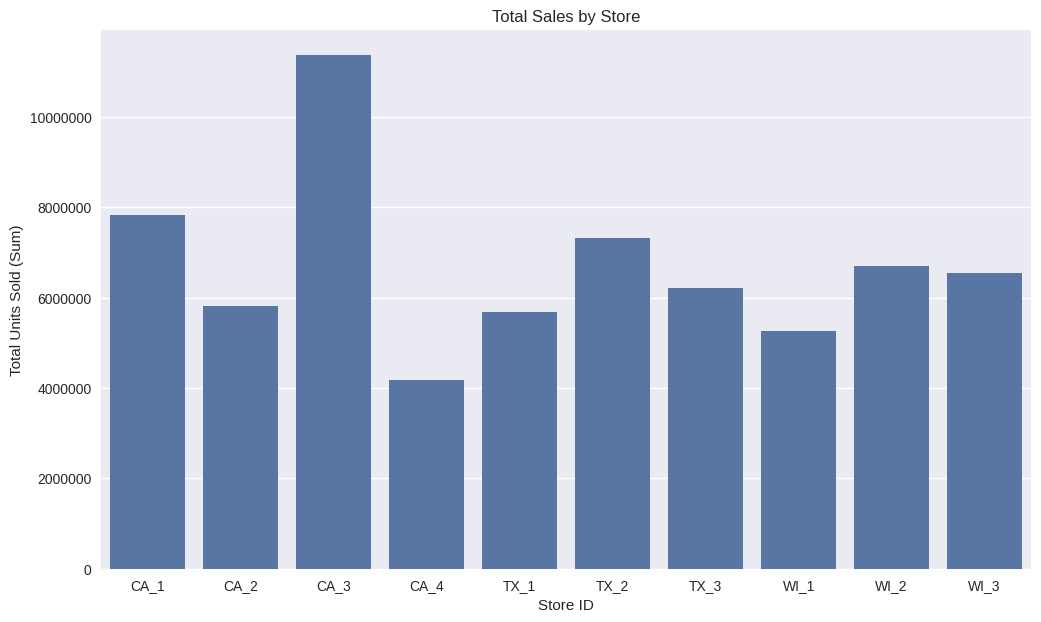

In [14]:
plt.figure(figsize=(12, 7))

total_sales = df.groupby('store_id')['sales'].sum().reset_index()

sns.barplot(x='store_id', y='sales', data=total_sales)

plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Units Sold (Sum)')

plt.show()

del total_sales

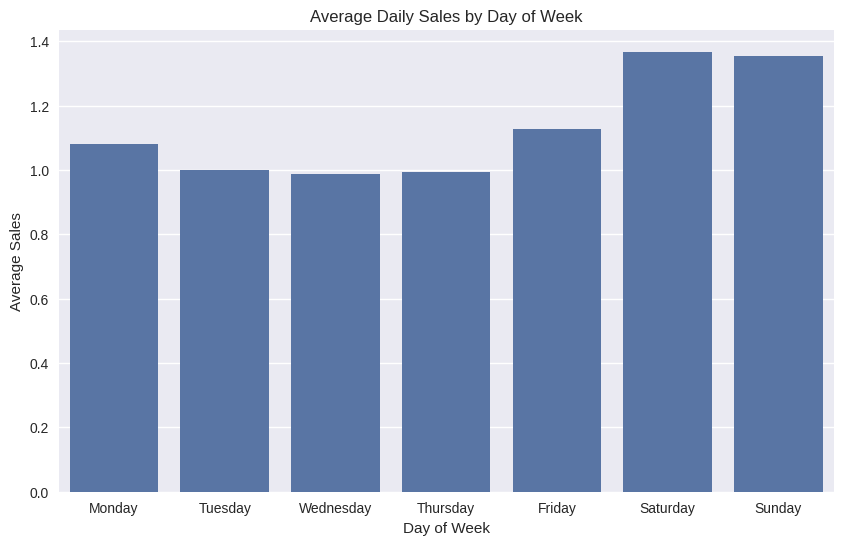

In [15]:
# Aggregate sales by day of the week
weekday_sales = df.groupby('weekday')['sales'].mean().reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['weekday'] = pd.Categorical(weekday_sales['weekday'], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values('weekday')

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='sales', data=weekday_sales)
plt.title('Average Daily Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')

plt.show()

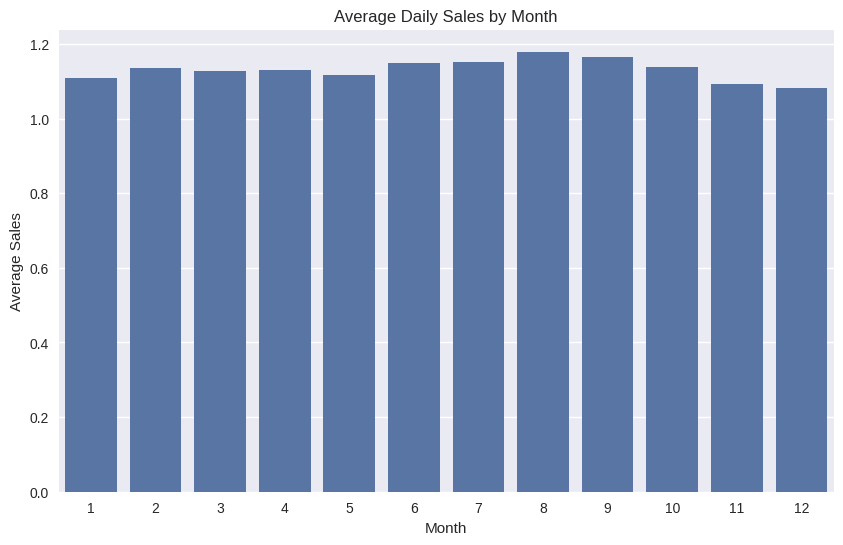

In [16]:
month_sales = df.groupby('month')['sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='sales', data=month_sales)
plt.title('Average Daily Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')

plt.show()

del weekday_sales, weekday_order, month_sales

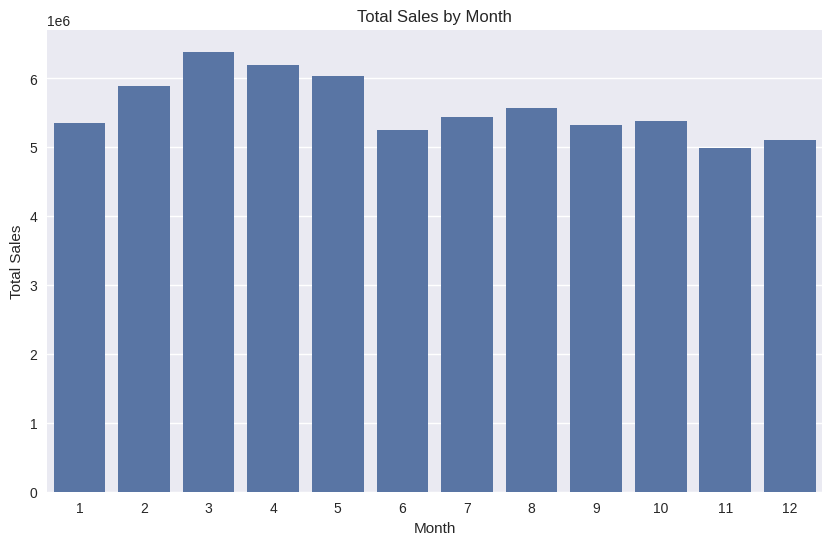

18786

In [17]:
monthly_sales = (
    df.groupby('month', as_index=False)['sales']
    .sum()
    .sort_values('month')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='month', y='sales')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

del monthly_sales
gc.collect()

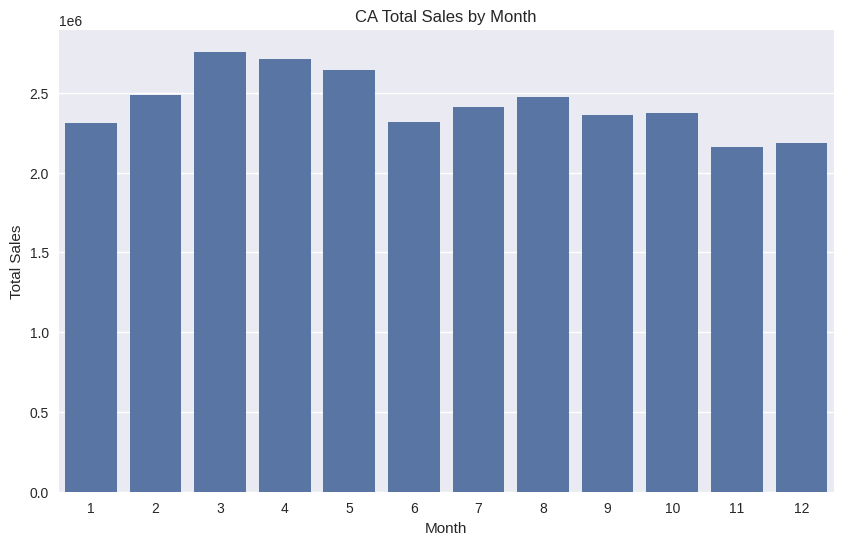

73367

In [18]:
CA_monthly_sales = (
    df[df['state_id'] == 'CA']
    .groupby('month', as_index=False)['sales']
    .sum()
    .sort_values('month')
)


plt.figure(figsize=(10, 6))
sns.barplot(data=CA_monthly_sales, x='month', y='sales')
plt.title("CA Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

del CA_monthly_sales
gc.collect()

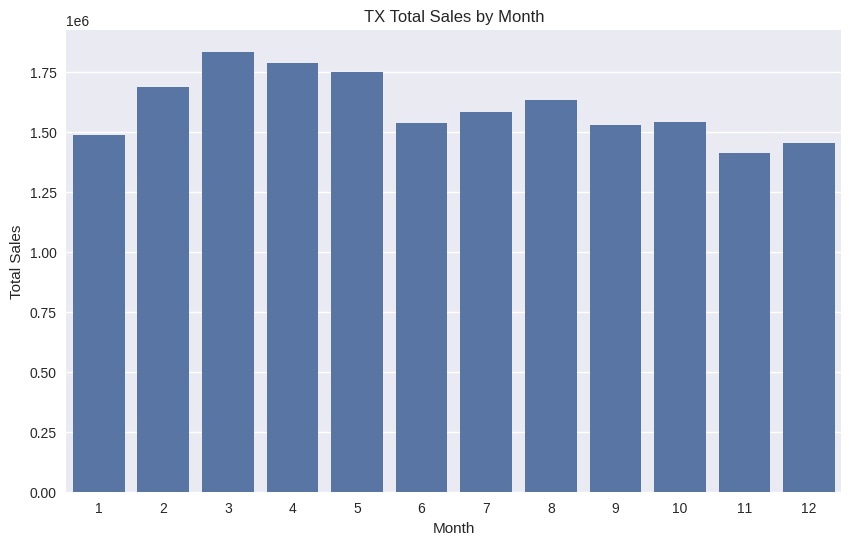

4739

In [19]:
TX_monthly_sales = (
    df[df['state_id'] == 'TX']
    .groupby('month', as_index=False)['sales']
    .sum()
    .sort_values('month')
)


plt.figure(figsize=(10, 6))
sns.barplot(data=TX_monthly_sales, x='month', y='sales')
plt.title("TX Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

del TX_monthly_sales
gc.collect()

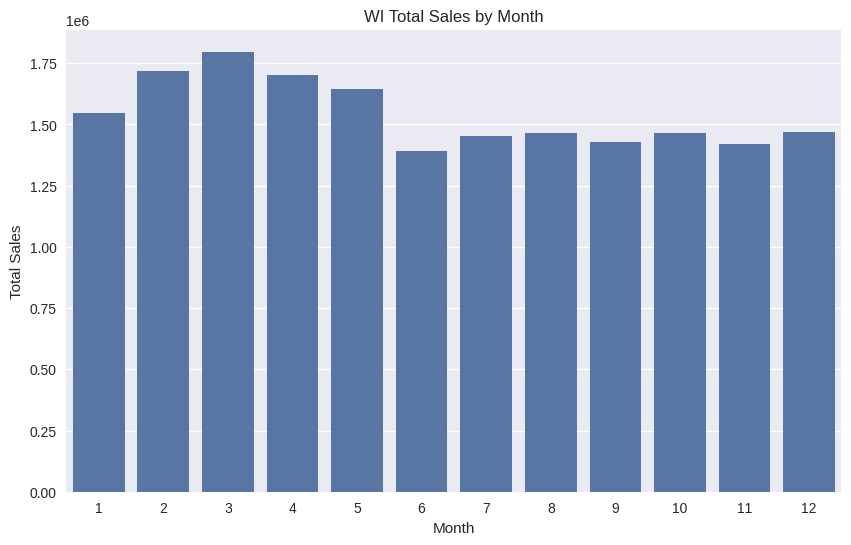

4945

In [20]:
WI_monthly_sales = (
    df[df['state_id'] == 'WI']
    .groupby('month', as_index=False)['sales']
    .sum()
    .sort_values('month')
)


plt.figure(figsize=(10, 6))
sns.barplot(data=WI_monthly_sales, x='month', y='sales')
plt.title("WI Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

del WI_monthly_sales
gc.collect()

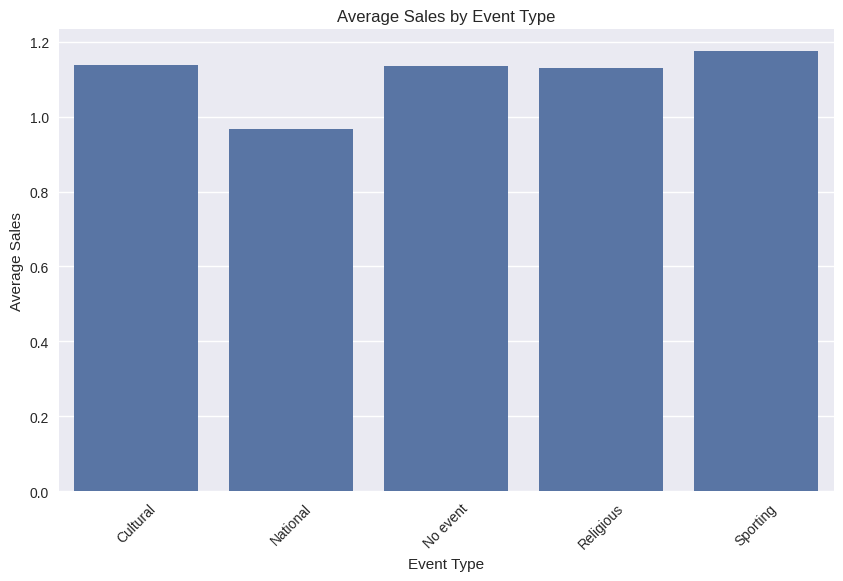

In [21]:
# Aggregate sales by event type
event_sales = df.groupby('event_type_1')['sales'].mean().reset_index().sort_values('sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='event_type_1', y='sales', data=event_sales)
plt.title('Average Sales by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

plt.show()

del event_sales

In [22]:
gc.collect()

4939

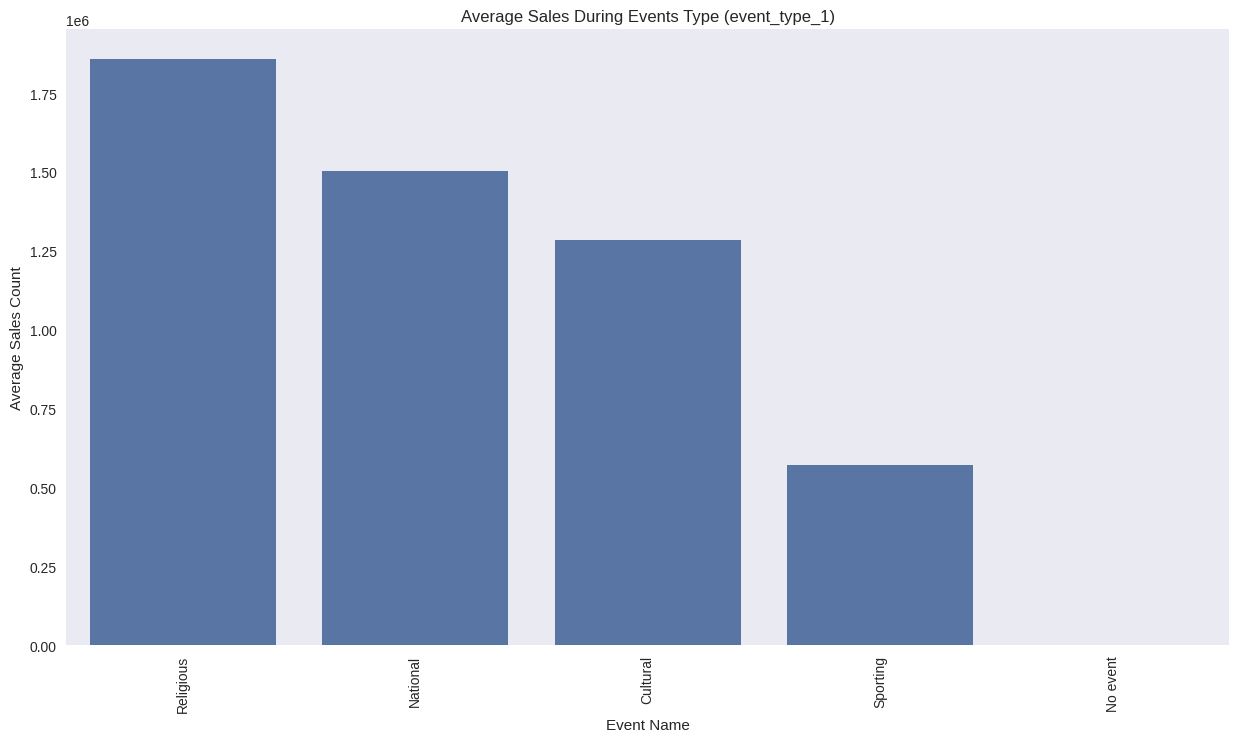

3360

In [23]:
event_sales= df[df['event_type_1'] != 'No event']
event_sales = event_sales.groupby('event_type_1')['sales'].sum().reset_index()
event_sales = event_sales.sort_values(by='sales', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(
    x='event_type_1',
    y='sales',
    data=event_sales,
    order=event_sales['event_type_1']
)
plt.title('Average Sales During Events Type (event_type_1)')
plt.xlabel('Event Name')
plt.ylabel('Average Sales Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


del event_sales
gc.collect()

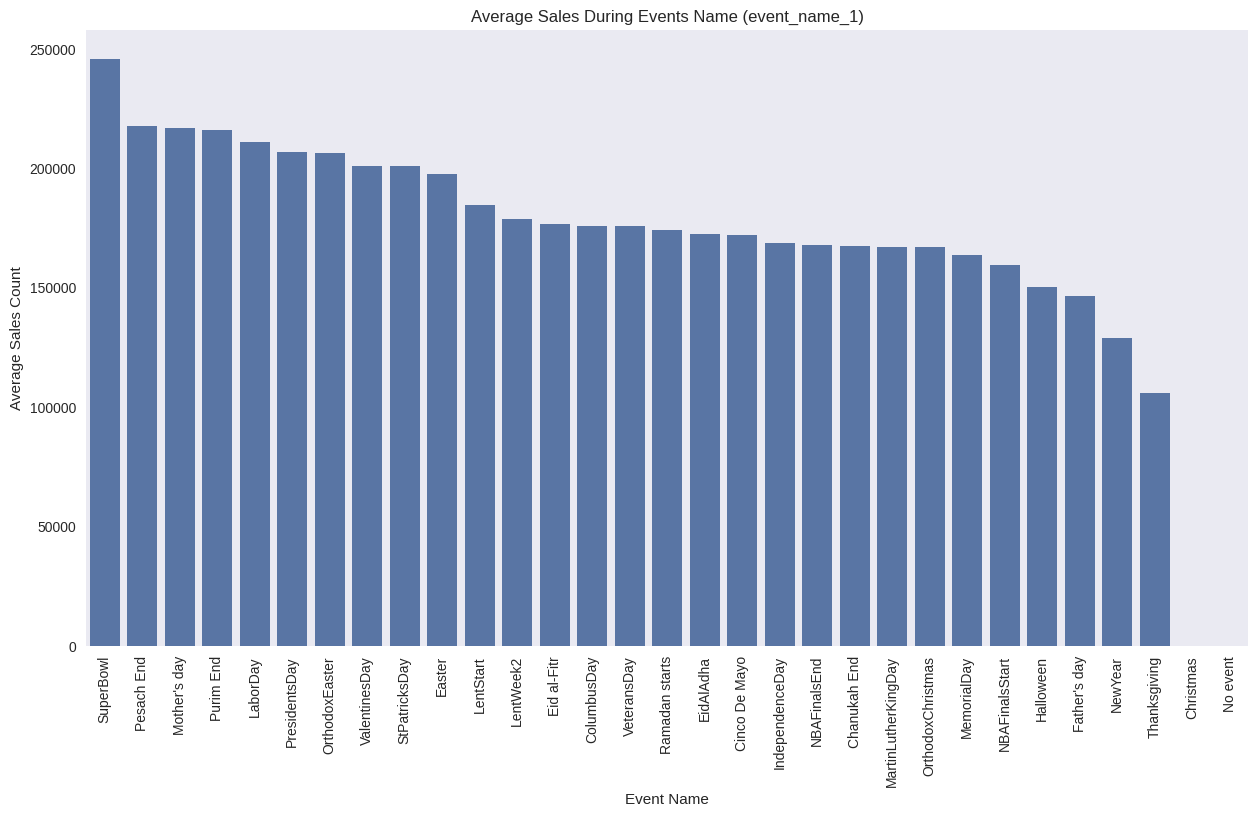

3416

In [24]:
event_sales= df[df['event_name_1'] != 'No event']
event_sales = event_sales.groupby('event_name_1')['sales'].sum().reset_index()
event_sales = event_sales.sort_values(by='sales', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(
    x='event_name_1',
    y='sales',
    data=event_sales,
    order=event_sales['event_name_1']
)
plt.title('Average Sales During Events Name (event_name_1)')
plt.xlabel('Event Name')
plt.ylabel('Average Sales Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


del event_sales
gc.collect()

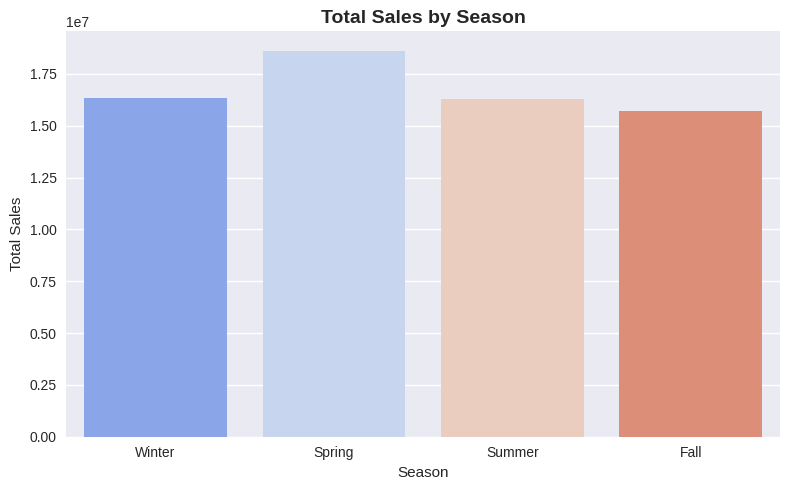

8727

In [25]:
def get_season(month: int) -> str:
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

season_sales = (
    df
    .assign(season=df['month'].apply(get_season))
    .groupby('season', as_index=False)['sales']
    .sum()
    .sort_values('sales', ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=season_sales,
    x='season',
    y='sales',
    palette='coolwarm',
    order=['Winter', 'Spring', 'Summer', 'Fall']
)
plt.title("Total Sales by Season", fontsize=14, weight='bold')
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

del season_sales
gc.collect()

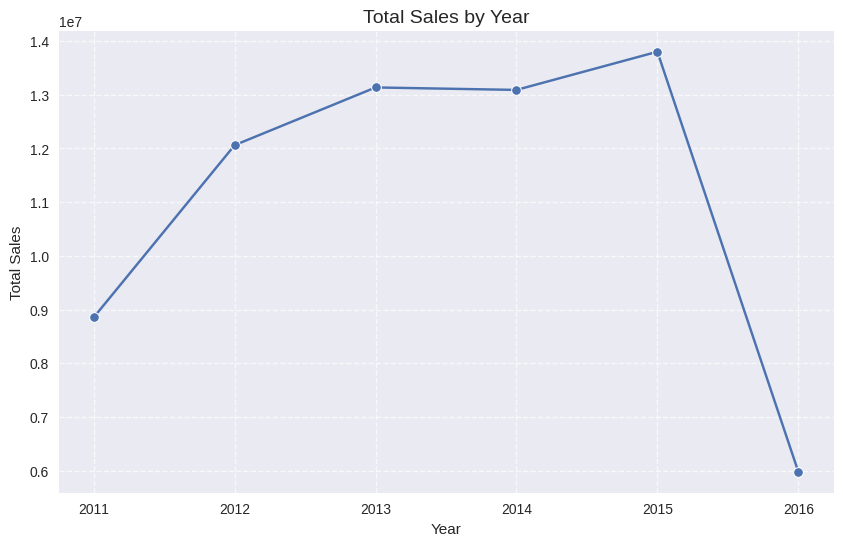

3281

In [26]:
yearly_sales = (
    df.groupby('year', as_index=False)['sales']
    .sum()
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='year', y='sales', marker='o')
plt.title("Total Sales by Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

del yearly_sales
gc.collect()

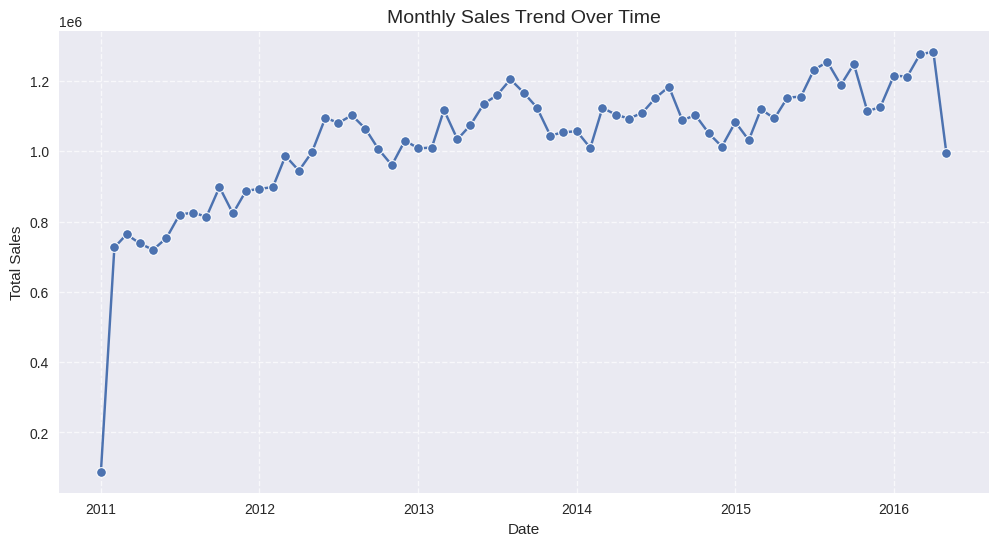

3601

In [27]:
monthly_trend = (
    df.groupby(['year', 'month'], as_index=False)['sales']
    .sum()
)
monthly_trend['date'] = pd.to_datetime(monthly_trend[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='date', y='sales', marker='o')
plt.title("Monthly Sales Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

del monthly_trend
gc.collect()

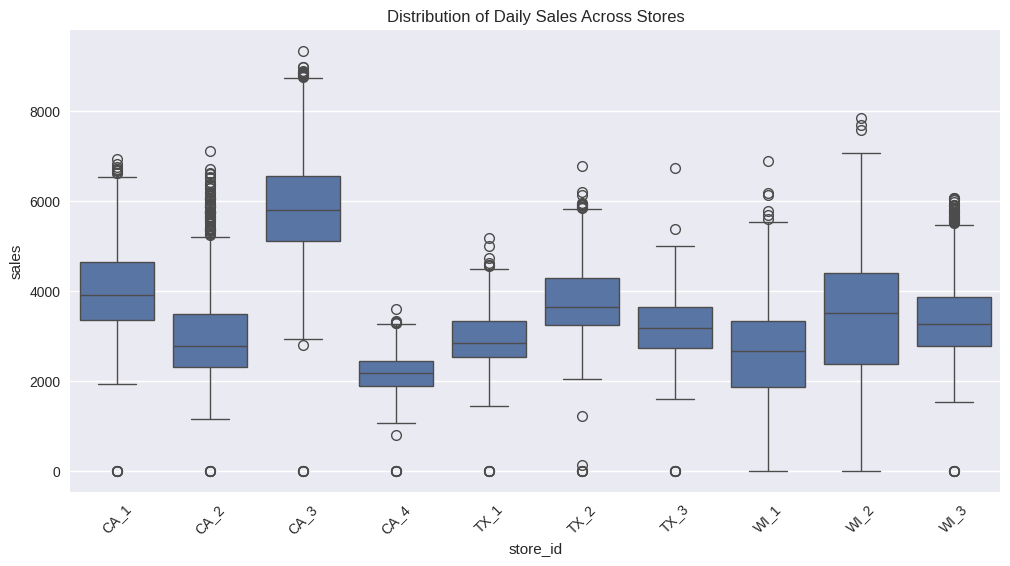

3173

In [28]:
daily_store_sales = df.groupby(['store_id', 'date'])['sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(x='store_id', y='sales', data=daily_store_sales)
plt.title('Distribution of Daily Sales Across Stores')
plt.xticks(rotation=45)
plt.show()

del daily_store_sales
gc.collect()

In [29]:
gc.collect()

7306

Unique states in filtered data: ['CA', 'TX', 'WI']
Categories (3, object): ['CA', 'TX', 'WI']


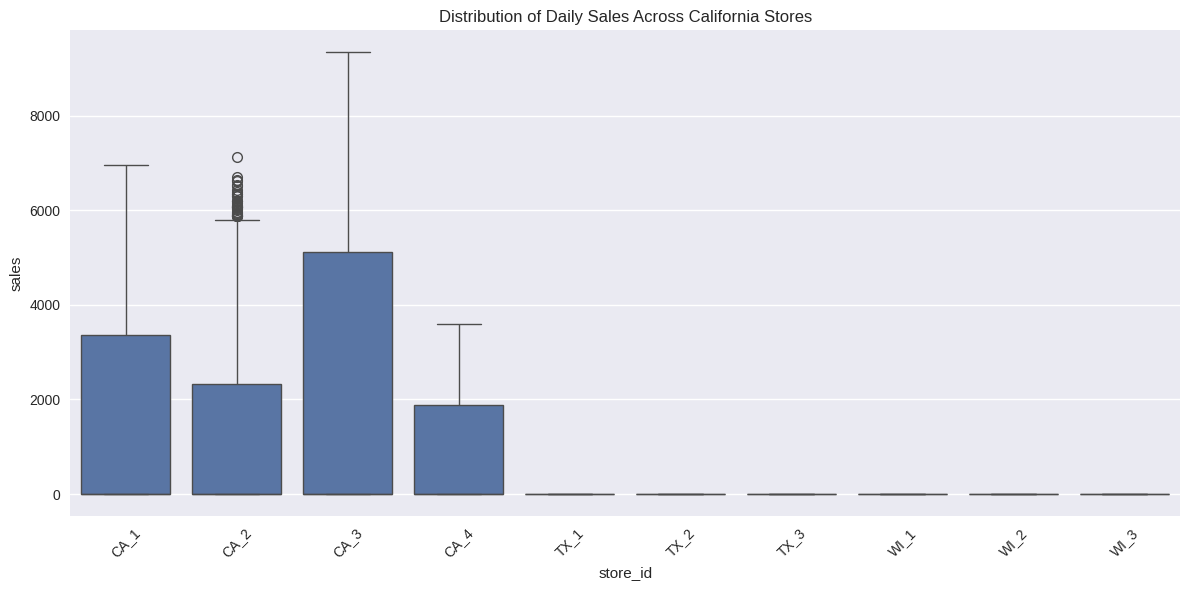

141

In [30]:
CA_df = df[df['state_id'] == 'CA']

CA_daily_store_sales = (
    CA_df.groupby(['state_id', 'store_id', 'date'])['sales']
    .sum()
    .reset_index()
)

print("Unique states in filtered data:", CA_daily_store_sales['state_id'].unique())

plt.figure(figsize=(12, 6))
sns.boxplot(x='store_id', y='sales', data=CA_daily_store_sales)
plt.title('Distribution of Daily Sales Across California Stores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

del CA_df, CA_daily_store_sales
gc.collect()

Unique states in filtered data: ['CA', 'TX', 'WI']
Categories (3, object): ['CA', 'TX', 'WI']


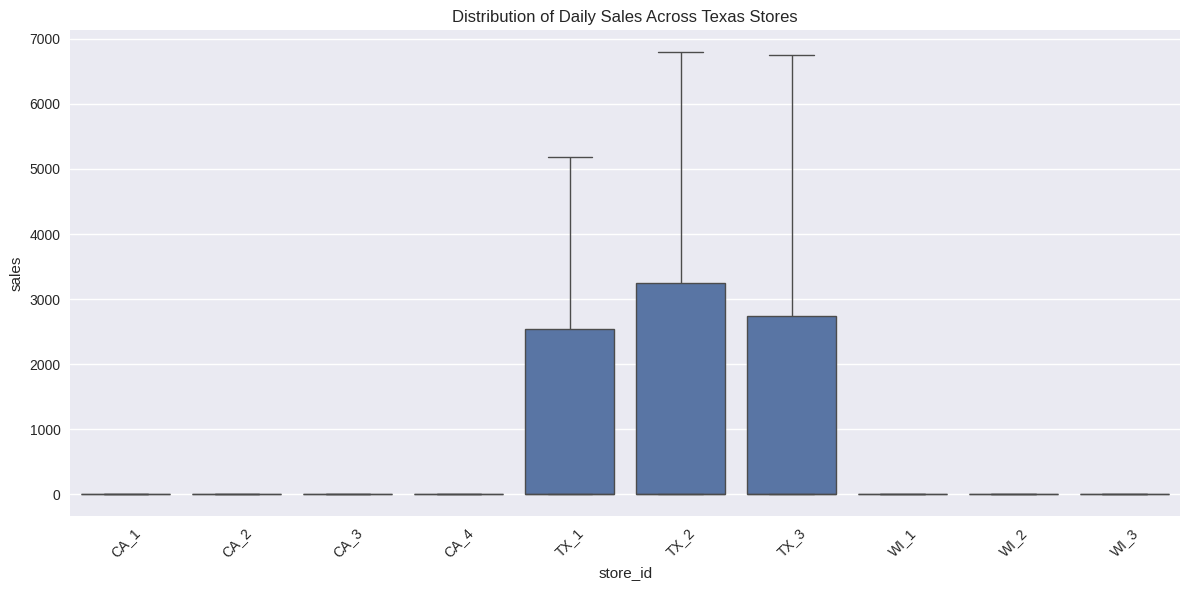

7439

In [31]:
TX_df = df[df['state_id'] == 'TX']

TX_daily_store_sales = (
    TX_df.groupby(['state_id', 'store_id', 'date'])['sales']
    .sum()
    .reset_index()
)

print("Unique states in filtered data:", TX_daily_store_sales['state_id'].unique())

plt.figure(figsize=(12, 6))
sns.boxplot(x='store_id', y='sales', data=TX_daily_store_sales)
plt.title('Distribution of Daily Sales Across Texas Stores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

del TX_df, TX_daily_store_sales
gc.collect()

Unique states in filtered data: ['CA', 'TX', 'WI']
Categories (3, object): ['CA', 'TX', 'WI']


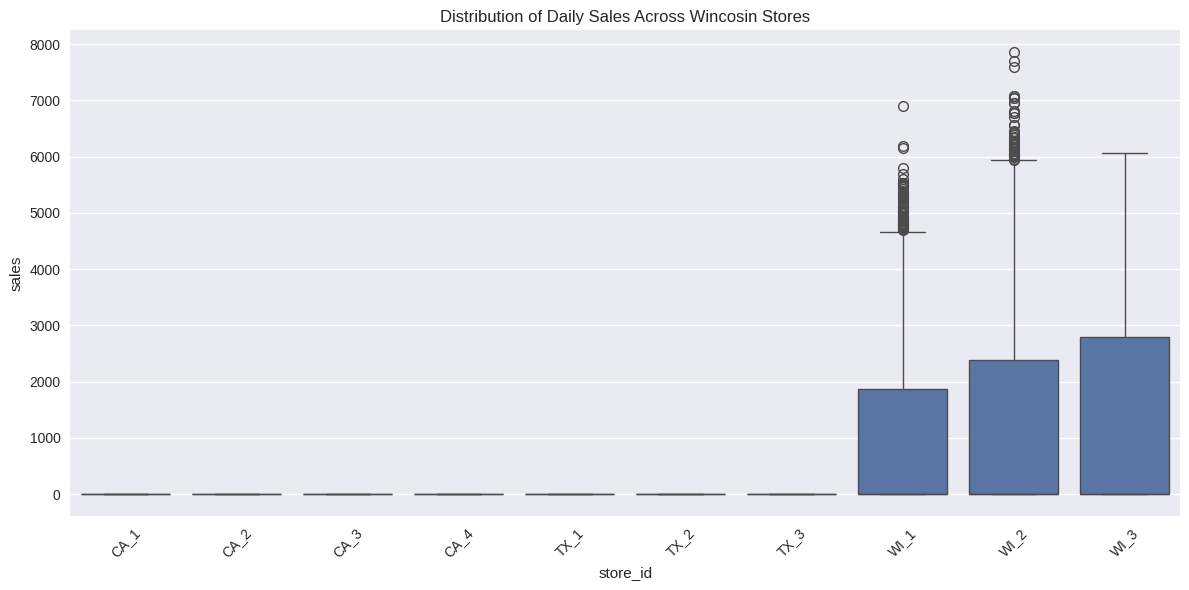

7748

In [32]:
WI_df = df[df['state_id'] == 'WI']

WI_daily_store_sales = (
    WI_df.groupby(['state_id', 'store_id', 'date'])['sales']
    .sum()
    .reset_index()
)

print("Unique states in filtered data:", WI_daily_store_sales['state_id'].unique())

plt.figure(figsize=(12, 6))
sns.boxplot(x='store_id', y='sales', data=WI_daily_store_sales)
plt.title('Distribution of Daily Sales Across Wincosin Stores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

del WI_df, WI_daily_store_sales
gc.collect()

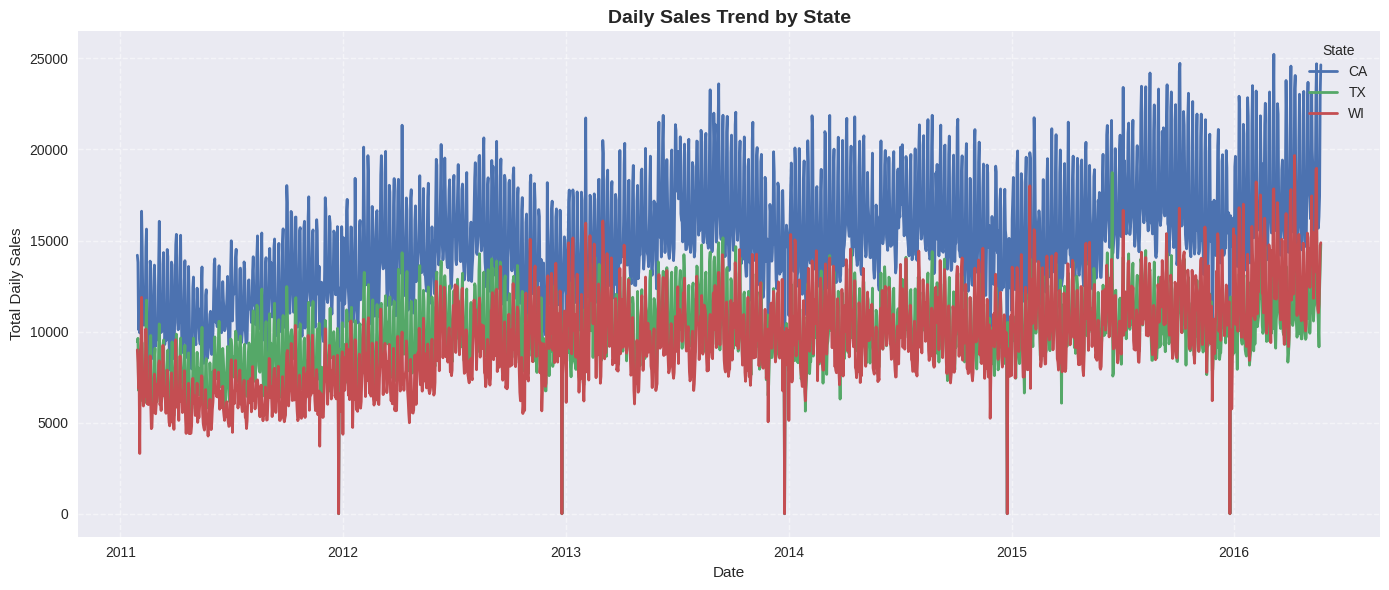

8300

In [33]:
state_daily_sales = (
    df.groupby(['state_id', 'date'])['sales']
    .sum()
    .reset_index()
)
state_daily_sales = state_daily_sales.sort_values('date')

plt.figure(figsize=(14, 6))
sns.lineplot(data=state_daily_sales, x='date', y='sales', hue='state_id', linewidth=2)

plt.title('Daily Sales Trend by State', fontsize=14, weight='bold')
plt.xlabel('Date')
plt.ylabel('Total Daily Sales')
plt.legend(title='State', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

del state_daily_sales
gc.collect()


Top-selling dates:
           date  sales
1933 2016-05-15  59921
1863 2016-03-06  57218
1891 2016-04-03  56425
1897 2016-04-09  56340
1834 2016-02-06  55040

Total sales by weekday:
    weekday     sales
2  Saturday  11594343
3    Sunday  11482526
0    Friday   9517020
1    Monday   9139596
5   Tuesday   8448634


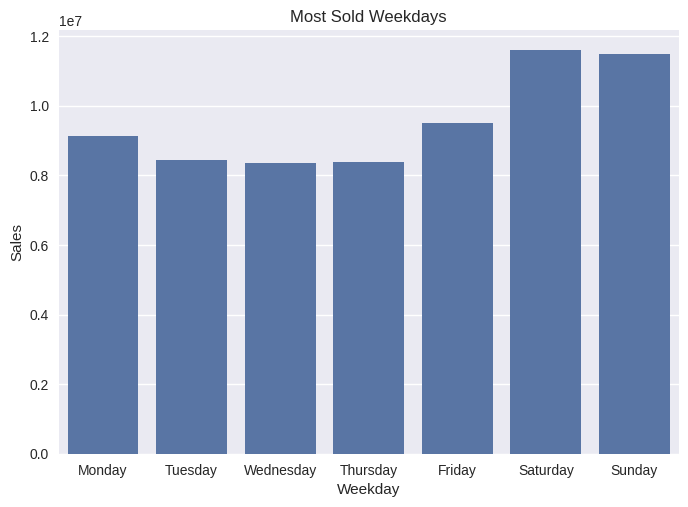

4168

In [34]:
most_sold_date = (
    df.groupby(['date'], as_index=False)['sales']
    .sum()
    .sort_values('sales', ascending=False)
)

print("Top-selling dates:")
print(most_sold_date.head())

most_weekday_sales = (
    df.groupby(['weekday'], as_index=False)['sales']
    .sum()
    .sort_values('sales', ascending=False)
)

print("\nTotal sales by weekday:")
print(most_weekday_sales.head())

sns.barplot(x='weekday', y='sales', data=most_weekday_sales,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.title('Most Sold Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.show()

del most_sold_date, most_weekday_sales
gc.collect()


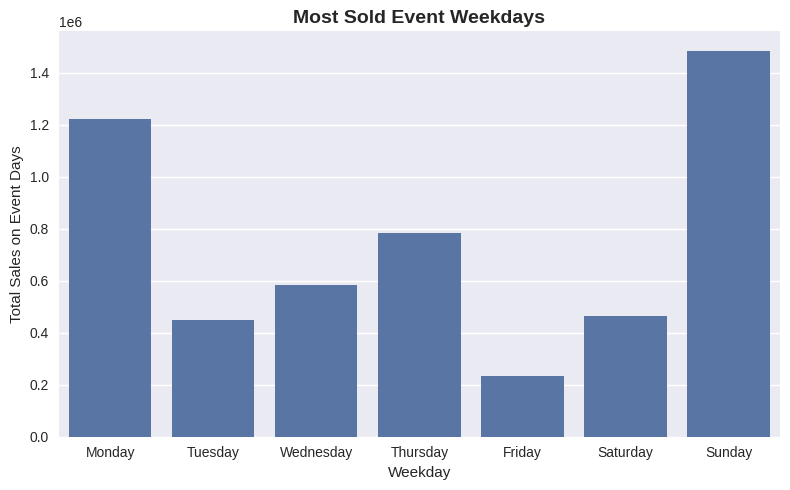

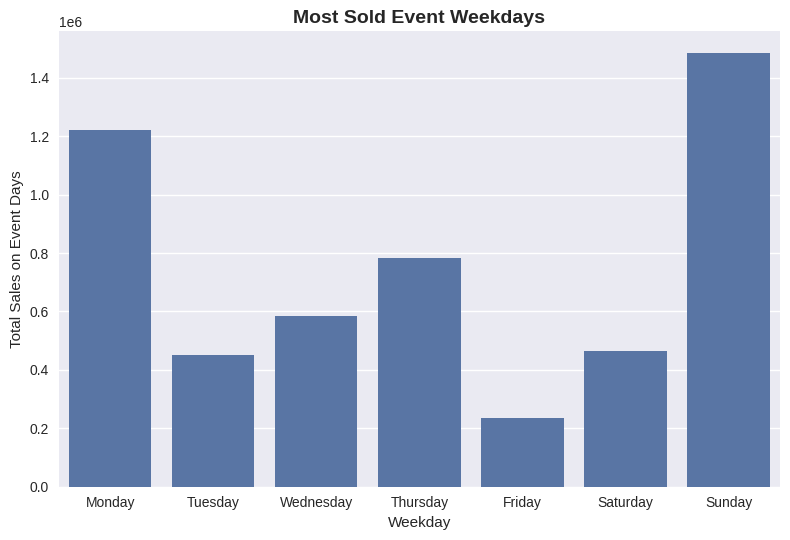

7513

In [35]:
event_days = df[df['event_type_1'] != 'No event']

event_weekday_sales = (
    event_days.groupby('weekday', as_index=False)['sales']
    .sum()
    .sort_values('sales', ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='weekday',
    y='sales',
    data=event_weekday_sales,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.title('Most Sold Event Weekdays', fontsize=14, weight='bold')
plt.xlabel('Weekday')
plt.ylabel('Total Sales on Event Days')
plt.tight_layout()
plt.show()

sns.barplot(
    x='weekday',
    y='sales',
    data=event_weekday_sales,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.title('Most Sold Event Weekdays', fontsize=14, weight='bold')
plt.xlabel('Weekday')
plt.ylabel('Total Sales on Event Days')
plt.tight_layout()
plt.show()

del event_days, event_weekday_sales
gc.collect()

In [36]:
gc.collect()

3726